# 분류 모델의 성능 평가 지표

## **Accuracy (정확도)**
### **1. 타이타닉 생존자 예측**

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 단순한 Classifer생성
# BaseEstimator 상속 받음

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        
        return pred
    

**MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna("N", inplace = True)
    df['Embarked'].fillna("N", inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]  # 첫 문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 타이타닉 생존자 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습 / 예측/ 평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypred)))

Dummy Classifier의 정확도는 : 0.7877


### **2. MNIST 데이터 세트**

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

**digit 데이터 로드**

In [4]:
# digits 확인
digits = load_digits()
#digits

In [5]:
# 사이킷런의 내장 데이터셋인 load_digitis()를 이용하여 MNIST데이터 로딩

In [6]:
# 데이터 형태 확인
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

**7인 데이터 확인**

In [8]:
digits.target == 7

array([False, False, False, ..., False, False, False])

**7인 데이터는 1, 그 외 데이터는 0으로 변환**

In [9]:
# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환
# 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

**학습 / 테스트 데이터 세트로 분리 (default = 0.25)**

In [10]:
# 학습 / 테스트 데이터 세트로 분리 (default = 0.25)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [11]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [12]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [13]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**불균형한 레이블 데이터 분포도 확인**

In [15]:
# 불균형한 레이블 데이터 분포도 확인
print('y_test.shape : ', y_test.shape)
pd.Series(y_test).value_counts()

y_test.shape :  (450,)


0    405
1     45
dtype: int64

In [16]:
# Dummy Classifier로 학습 / 예측 / 정확도 평가
fake_cl = MyFakeClassifier()
fake_cl.fit(X_train, y_train)
fakePred = fake_cl.predict(X_test)
accuracy = accuracy_score(y_test, fakePred)
print('정확도 : ', np.round((accuracy), 3))

정확도 :  0.9


## **Confustion Matirx(오차 행렬)**

In [17]:
from sklearn.metrics import confusion_matrix

# MNIST의 fakepred
confusion_matrix(y_test, fakePred)  # (참 값, 예측 값)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## **정밀도와 재현율**

In [18]:
# 정밀도와 재현율 계산에 사용되는 예측값
# 앞에서 Dummy Classifier로 학습 후 예측한 값 : fakepred
# 앞에 다 있는 내용인데 흩어져 있어서 정밀도와 재현율 계산을 위해 다시 모아서 적음

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)
fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)

In [19]:
# 참고 : fakepred값 확인
# fakedpred ⇒ 모두 False
fakepred.astype(int).sum()

0

In [20]:
# 정밀도와 재현율 계산
# 정밀도 계산 : precision_score(실제값, 예측값)
# 재현율 계산 : recall_score(실제값, 예측값)
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도 : ', precision_score(y_test, fakepred))
print('재현율 : ', recall_score(y_test, fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\ftsv2\Anaconda3\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도는 90%이지만 정밀도, 재현율은 굉장히 작아 0으로 표현됨
- 분자가 0임

### **오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수**

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)   # 오차행렬
    accuracy = accuracy_score(y_test, pred)      # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)          # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}' .format(accuracy))
    print('정밀도 : {1:.3f}' .format(precision))
    print('재현율 : {1:.3f}' .format(recall))

**앞의 타이타닉 데이터 세트 전처리 작업 내용**

In [22]:
# 타이타닉 데이터 세트 전처리 작용 내용 (앞에서 했음)
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna("N", inplace = True)
    df['Embarked'].fillna("N", inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]  # 첫 문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 타이타닉 생존자 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

C:\Users\ftsv2\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


오차행렬
[[92 18]
 [16 53]]
정확도 : 0.810


IndexError: tuple index out of range

In [23]:
ir_clf = LogisticRegression(solver='liblinear')

## **Precision / Recall Trade-off**

### **predict_proba() 메소드**

In [24]:
# lr_clf = LogisiticRegression()
# predict_proba(테스트 피처 데이터 세트) : 예측 확률 반환

pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[0.85252649, 0.14747351],
       [0.89303676, 0.10696324],
       [0.93352957, 0.06647043],
       [0.05395543, 0.94604457],
       [0.31348353, 0.68651647],
       [0.49528758, 0.50471242],
       [0.08226142, 0.91773858],
       [0.06493201, 0.93506799],
       [0.41774896, 0.58225104],
       [0.29207573, 0.70792427],
       [0.91335085, 0.08664915],
       [0.26753223, 0.73246777],
       [0.88107809, 0.11892191],
       [0.09260819, 0.90739181],
       [0.03405702, 0.96594298],
       [0.23254284, 0.76745716],
       [0.86245231, 0.13754769],
       [0.76501594, 0.23498406],
       [0.91261986, 0.08738014],
       [0.6442415 , 0.3557585 ],
       [0.67109087, 0.32890913],
       [0.05317901, 0.94682099],
       [0.88108   , 0.11892   ],
       [0.5678269 , 0.4321731 ],
       [0.29778243, 0.70221757],
       [0.10310765, 0.89689235],
       [0.90195551, 0.09804449],
       [0.29841921, 0.70158079],
       [0.16932538, 0.83067462],
       [0.39697904, 0.60302096],
       [0.

In [25]:
# predict(테스트 피처 데이터 세트) : 예측 결과 클래스 값 반환
pred = lr_clf.predict(X_test)

In [57]:
# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba.predict.reshape(-1, 1)], axis = 1)

print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

## **Binarizer**

In [33]:
from sklearn.preprocessing import Binarizer

X = [[0.5, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
bina = Binarizer(threshold = 1.0)
print(bina.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 반환**

In [48]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값 = 0.5로 설정
c_threshold = 0.5

# predict_proba() 반환값 ([0확률 1확률])의 두번째 컬럼
# 즉, Positive클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

# 정밀도 / 재현율 트레이드 오프
# 한 쪽을 향상 시키면 다른 수치 감소하니까 적당한 수치 선택

TypeError: get_clf_eval() takes 2 positional arguments but 3 were given

**분류 결정 임계값을 0.4로 변경**

In [29]:
custom_threshold = 0.4

# predict_proba()반환값 ([0확률 1확률])이 두번째 컬럼
# 즉, Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:.1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

# 임계값을 낮추니까 정밀도는 떨어지고 재현율 값은 올라감

TypeError: slice indices must be integers or None or have an __index__ method

In [42]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 presision recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('임계값 shape : ', thresholds.shape)
print('정밀도 shape : ', precisions.shape)
print('재현율 shape : ', recalls.shape)

idx = np.arange(0, thresholds.shape[0], 15)
print('\nsample index', idx)
print('임계값 sample : ', np.round(thresholds[idx], 3))
print('정밀도 sample : ', np.round(precisions[idx], 3))
print('재현율 sample : ', np.round(recalls[idx], 3))

임계값 shape :  (166,)
정밀도 shape :  (167,)
재현율 shape :  (167,)

sample index [  0  15  30  45  60  75  90 105 120 135 150 165]
임계값 sample :  [0.059 0.097 0.114 0.147 0.192 0.28  0.432 0.573 0.645 0.798 0.912 0.968]
정밀도 sample :  [0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
재현율 sample :  [1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


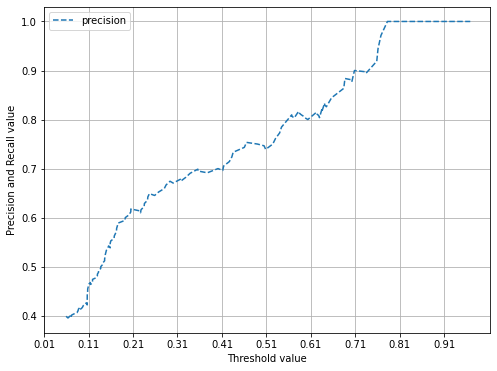

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제값 pred_proba_c1 예측 확률 값
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]  # (143,)에서 143 추출
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value') ; plt.ylabel('Precision and Recall value')
    plt.legend() ; plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

정밀도와 재현율 조합

## F1 Score

### **F1 Score**
- 정밀도와 재현율의 조화평균
- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐

In [49]:
# 사이킷런의 F1스코어 API : f1_score()
from sklearn.metrics import f1_score

f1

### **타이타닉 생존자 예측에서 F1 스코어**
- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
- 임계값 0.4~0.6별로 졍확도, 정밀도, 재현율, F1스코어 확인

In [50]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)   # 오차행렬
    accuracy = accuracy_score(y_test, pred)      # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)          # 재현율
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print추가
    print('정확도 : {0:.4f}' .format(accuracy))
    print('정밀도 : {1:.4f}' .format(precision))
    print('재현율 : {2:.4f}' .format(recall))
    print('F1 : {3:.4f}' .format(f1))

In [55]:
# 임계값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1).thresholds)

NameError: name 'get_eval_by_threshold' is not defined

In [59]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임계값 배열에서 샘플로 데이터 추출, 임계값을 5step으로 추출
# threshod[0]은 max(예측 확률) + 1 로 임의 설정되는데
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플용 임계값 : ', np.round(thresholds[thr_index], 2))
# 교재에서는 10개, 실제 11개

# 5step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임계값 별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값 별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46]
샘플용 임계값 :  [0.97 0.69 0.63 0.57 0.38 0.29 0.16 0.11 0.11 0.07]


In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc
    
    # 

In [61]:
# get_clf_eval()변경
# ROC-AUC 추가 : 예측 학률값을 기반으로 계산되므로
# 매개변수 pred_proba = None 추가
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuarcy = accuracy_score(y_test, pred)
    precision = precision_socre(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_accuracy(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.4f}' .format(accuracy))
    print('정밀도 : {1:.4f}' .format(precision))
    print('재현율 : {2:.4f}' .format(recall))
    print('F1 : {3:.4f}' .format(f1))
    print('ROC-AUC : {4:.4f}' .format(roc_auc))

In [ ]:
# 임계값 0.4~0.6별로